# Exercício de fixação de conceitos 2

## Objetivo

Regressão Logística Binária para o conjunto de dados de voz divido em gêneros masculino e feminino

## Importação de bibliotecas


In [46]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Leitura dos dados a partir de um txt:

In [2]:
dados = genfromtxt('dados_voz_genero.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remove cabeçalho
print(dados)

[[0.06424127 0.03202691 0.01507149 ... 0.         0.         1.        ]
 [0.06731003 0.04022874 0.01941387 ... 0.046875   0.05263158 1.        ]
 [0.08382942 0.03671846 0.00870106 ... 0.0078125  0.04651163 1.        ]
 ...
 [0.09579843 0.18373124 0.03342387 ... 2.9296875  0.19475862 0.        ]
 [0.09062826 0.18497617 0.0435081  ... 3.5859375  0.31100218 0.        ]
 [0.09288354 0.18304392 0.0700715  ... 0.546875   0.35       0.        ]]


In [4]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

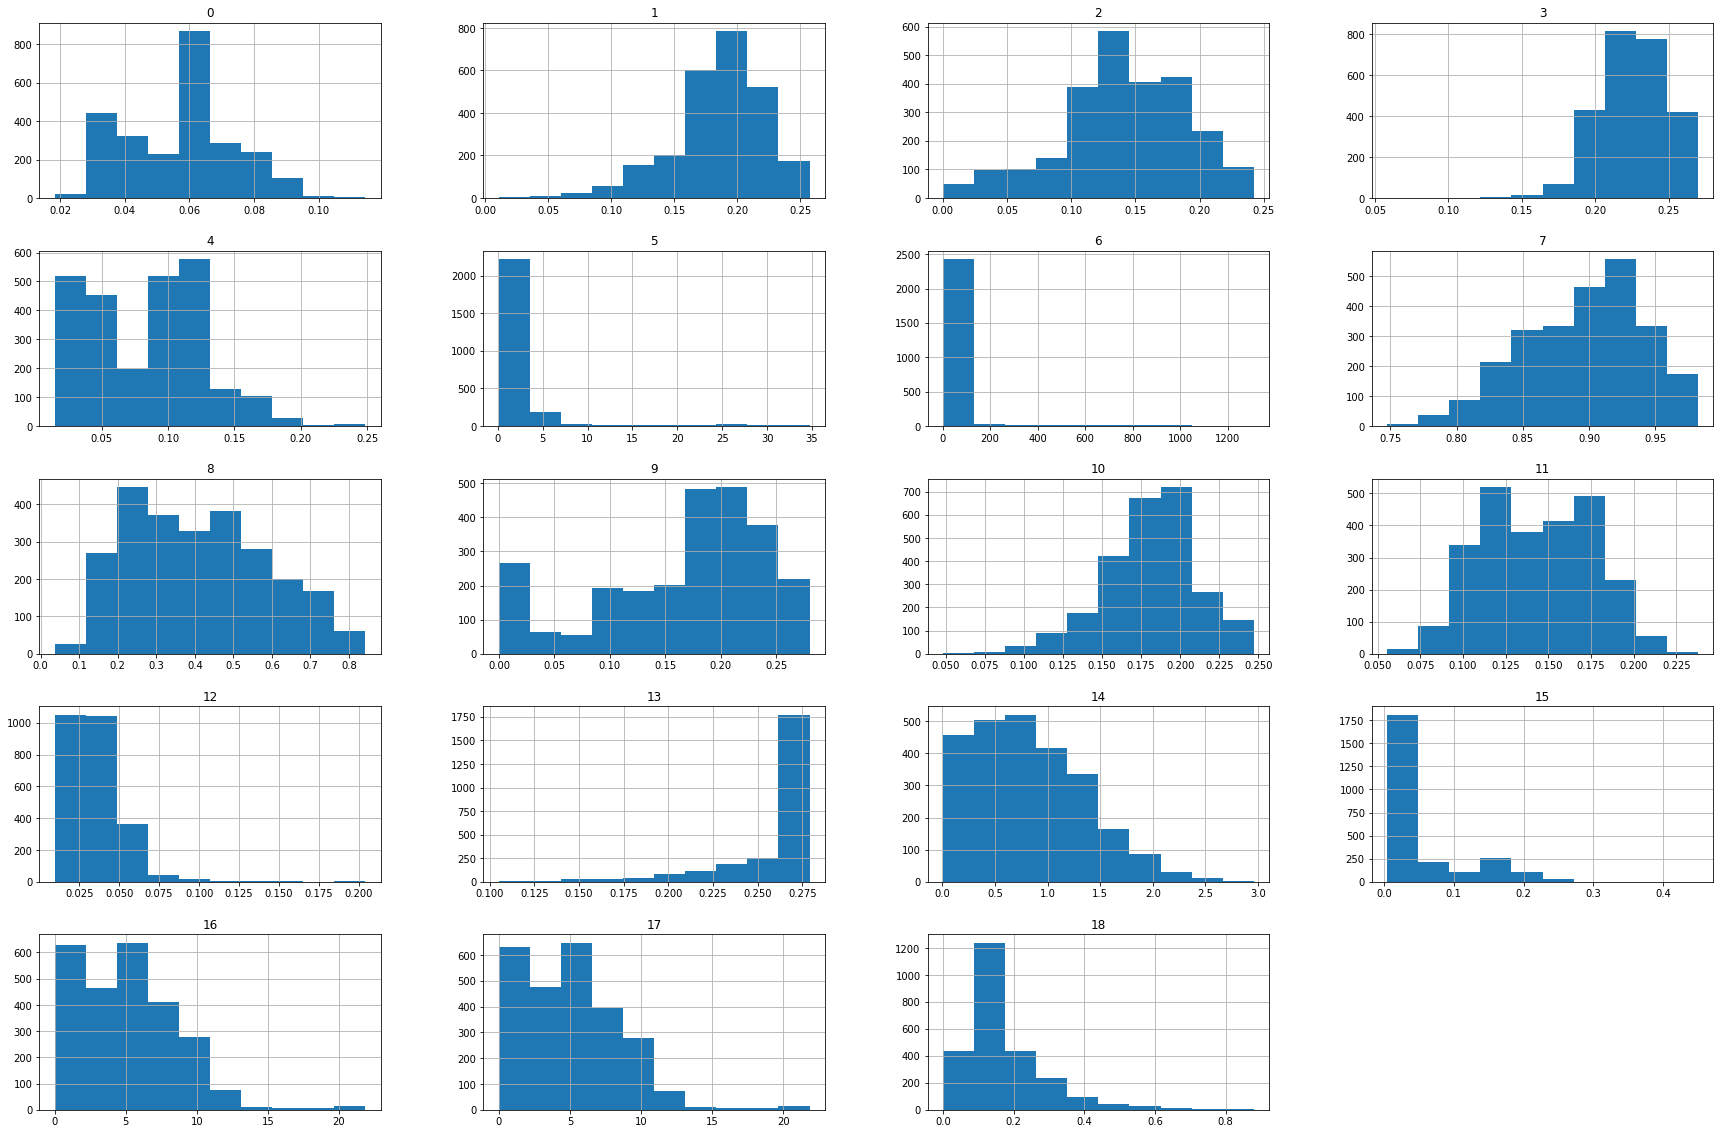

In [5]:
Xtrainpd = pd.DataFrame(Xtrain)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

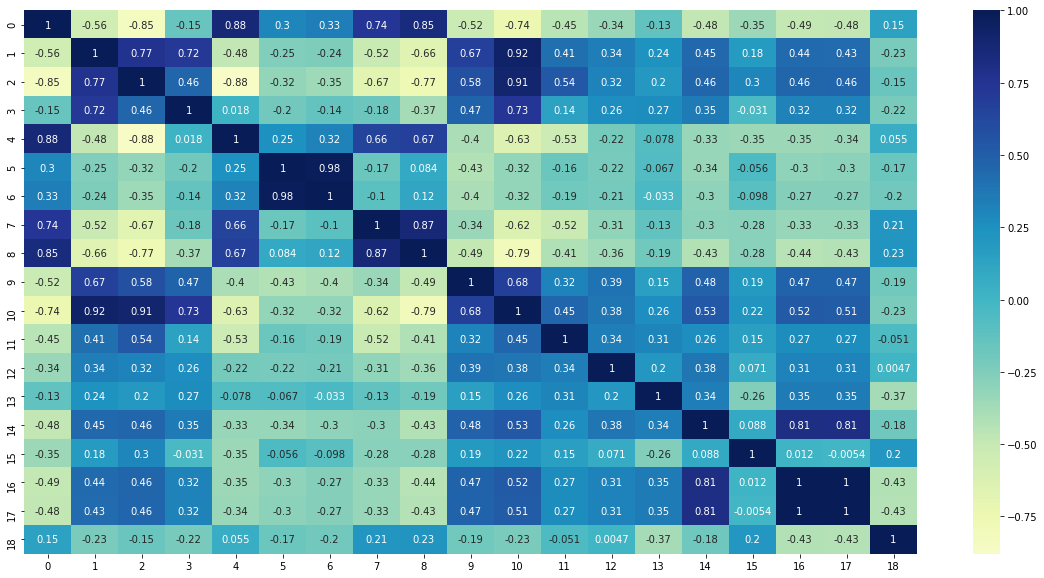

In [6]:
corrMatrix = Xtrainpd.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()


In [7]:
Xtrainpd[6].sort_values()
Xtrainpd[6].quantile(q = 0.95)

74.13659244399996

<AxesSubplot:>

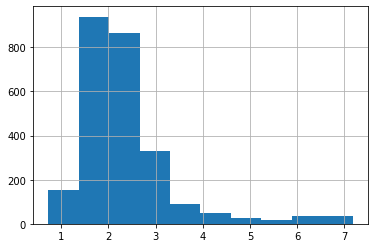

In [8]:
np.log(Xtrainpd[6]).hist()

As features 5 e 6 são muito assimétricas (skewness elevada), sendo assim seria interessante fazer algo no sentido de distribuir mais os valores no histograma.
No que se refere ao modo como os atributos estão correlacionados, observa-se que a 16 e 17 são quase colieares.

In [9]:
Xtrainpd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.057076,0.185897,0.140668,0.224817,0.084149,3.101255,35.411229,0.895593,0.409977,0.165914,0.181056,0.143244,0.036889,0.259010,0.831333,0.052680,5.087768,5.035088,0.173339
std,0.016609,0.035585,0.048286,0.023034,0.042857,4.115975,131.300243,0.044934,0.177693,0.076665,0.029393,0.032280,0.019097,0.029773,0.522330,0.062577,3.543251,3.543037,0.116301
min,0.018363,0.010975,0.000235,0.058268,0.014558,0.141735,2.068455,0.747569,0.036876,0.000000,0.048254,0.055565,0.009775,0.105263,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.042002,0.170161,0.111941,0.208972,0.042339,1.645452,5.686881,0.862093,0.259809,0.119505,0.164091,0.117203,0.018391,0.253968,0.420074,0.007812,2.312500,2.246094,0.100262
50%,0.059244,0.189919,0.140549,0.225499,0.093715,2.185421,8.307614,0.902328,0.397298,0.186667,0.184390,0.141514,0.046110,0.271186,0.770739,0.023438,4.992188,4.945312,0.140079
75%,0.066852,0.210309,0.175570,0.243150,0.114074,2.932971,13.626601,0.929852,0.535708,0.221459,0.198872,0.169855,0.047904,0.277457,1.189633,0.070312,7.101562,7.078125,0.210561
max,0.114508,0.257417,0.242124,0.269852,0.248770,34.725453,1309.612887,0.981997,0.842936,0.280000,0.247041,0.237636,0.204082,0.279114,2.957682,0.449219,21.867188,21.843750,0.879503


In [10]:
# regressão logística pela biblioteca SkLearn
logreg = LogisticRegression(max_iter=3500)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
print("Score:",logreg.score(Xtest,ytest))

Score: 0.9132492113564669


In [11]:
# matriz de confusão para threshold = 0.5
cmatrix = sk.confusion_matrix(ytest,ypred)
print(cmatrix)

[[257  44]
 [ 11 322]]


In [13]:
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest)[:,1])
totalpos = ytest.sum()
totalneg = ytest.shape[0] - ytest.sum() 
precisionvec = tpr*totalpos/(tpr*totalpos+fpr*totalneg)
recallvec = tpr

In [30]:
f1score = np.nan_to_num(2*recallvec*precisionvec/(recallvec+precisionvec))

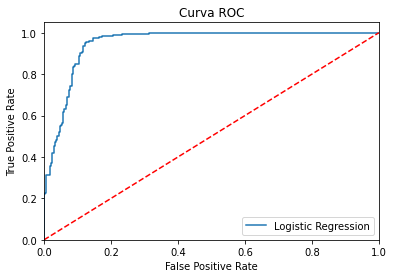

In [31]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

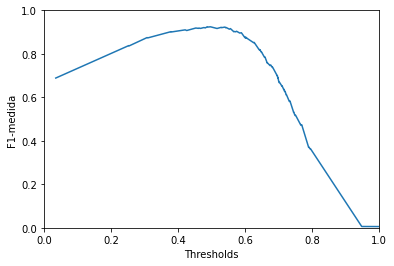

In [32]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('F1-medida')
plt.plot(thresholds,f1score,label='Falso Positivo')
plt.show()

In [54]:
bestf1 = f1score[f1score.argmax()]
besthresh = thresholds[f1score.argmax()]
print(besthresh)
print(bestf1)

0.4874404319982447
0.9246088193456614


In [55]:
f1_score(ytest, ypred)

0.9246088193456614

In [38]:
0# melhor valor para threshold a partir da média geométrica
geo = np.sqrt(tpr * (1-fpr))
index_geo = np.argmax(geo)
print('Best Threshold = %f' % thresholds[index_geo])

Best Threshold = 0.540242


In [48]:
# predição com o valor ótimo encontrado para threshold
ypred = (logreg.predict_proba(Xtest)[:,1] >= besthresh).astype(int)

In [49]:
cmatrix1 = sk.confusion_matrix(ytest,ypred)
print(cmatrix1)

[[256  45]
 [  8 325]]


Text(0.5, 1.0, 'Accuracy Score: 0.9164')

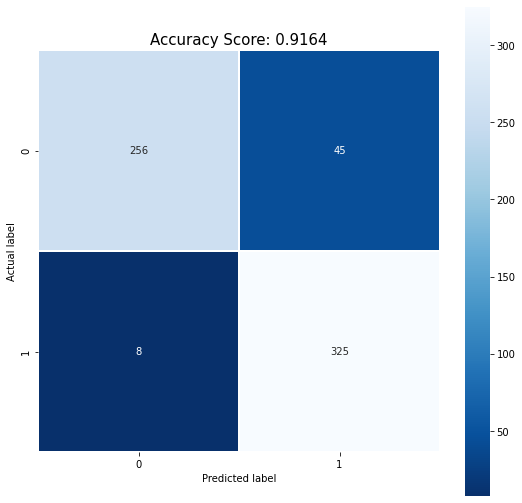

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest,ypred))
plt.title(all_sample_title, size = 15)


0.9246088193456614